# NETFLIX CASE STUDY
      By Shashank Gupta

Dataset Link:- https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Collab Link:- https://colab.research.google.com/drive/1MGz7_doG49faCSyRm2beCQJKC-V45OeE#scrollTo=TCReU0TFQPnq

#### Introduction and pre-requisitis # I am shanky
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.


In [ ]:
# uploading dataset
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv" -O netflix.csv

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

--2024-12-14 16:26:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.217, 18.239.15.127, 18.239.15.11, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.08s   

2024-12-14 16:26:57 (38.7 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
# Loading dataset
netflix_df=pd.read_csv('/content/netflix.csv')
df=netflix_df.copy()
# Basic metrics
print("Total no of data=", netflix_df.shape[0])
print("Total no of features=", netflix_df.shape[1])
print("Features=", netflix_df.columns)

Total no of data= 8807
Total no of features= 12
Features= Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# Analysing Basic Metrics


### SAMPLE DATASET

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Shape of the dataframe

In [ ]:
netflix_df.shape

(8807, 12)

This indicates that the data is entered into rows- wise and the features are changed over columns.





# Information about the dataset

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 12 features out of which 11 of them are having object datatypes and 1 of them has integer datatype.


# Statistical analysis of data

In [ ]:
# for features of object datatype
netflix_df.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
# for feature release_year
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Missing value detection & Imputation
Imputation is a treatment method for missing value by filling it in using
certain techniques.


In [ ]:
# detecting the null values
print(" Total null values in the dataset=", netflix_df.isnull().sum().sum(),end="\n\n")
print("null values in each featues")
print( netflix_df.isnull().sum() )

 Total null values in the dataset= 4307

null values in each featues
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# changing the date_added column to datetime format
import datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
# changing the null values with the last date of the realease year of that movie
netflix_df['date_added'] = netflix_df['date_added'].fillna(netflix_df['date_added'].min())

print(netflix_df['date_added'].isnull().sum())
# all the missing values in the date_added feature has been added.

0


In [ ]:
print(" data with the missing duration")
netflix_df[netflix_df['duration'].isnull()]

 data with the missing duration


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# on analysing the dataset we can see that the duration values are filled in the rating column.
# Therefore we remove the values from rating and import them in duration

null_duration_indices=netflix_df.index[netflix_df['duration'].isnull()]
# Delete rating for those rows


netflix_df['duration'] = netflix_df['duration'].fillna(netflix_df['rating'])
netflix_df.loc[null_duration_indices, 'rating'] = np.nan

In [ ]:
print("Missing data in rating",netflix_df['rating'].isnull().sum())
print("Missing data in duration",netflix_df['duration'].isnull().sum())

Missing data in rating 7
Missing data in duration 0



Now the rating column has 7 null values while the duration has 0 null values.

When we fill the rest of the values to unavailable.

In [ ]:
# handling null values by filling NA or removing the data row
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.fillna({'country':"Country Unavailable",'rating':"Not Rated"},inplace=True)
print( netflix_df.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


<ipython-input-13-41305588b848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df.director.fillna("No Director", inplace=True)
<ipython-input-13-41305588b848>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# Re-analysing the statistical analysis
Since the data has been formatted, the data need to be analysed again for better insights.


In [ ]:
netflix_df.describe()


,date_added,release_year
count,8807,8807.000000
mean,2019-05-12 12:46:40.862949888,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-03 00:00:00,2013.000000
50%,2019-07-01 00:00:00,2017.000000
75%,2020-08-18 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [ ]:
netflix_df.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,8807,4529,No Director,2634
cast,8807,7693,No Cast,825
country,8807,749,United States,2818
rating,8807,15,TV-MA,3207
duration,8807,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


##Non-Graphical Analysis





In [ ]:
# displaying the unique values in each columns
unique_values = netflix_df.nunique()
print(unique_values)

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1714
release_year      74
rating            15
duration         220
listed_in        514
description     8775
dtype: int64


On the basis of above data, we display the preceding details.
We will check
- which is prefered movie or tv show.
- which director has the most no of movies uploaded.
- which actor has present the most no of movies by each actor
- what are the different types of rating and mostly whatrating content is available?
- which duration is most common for single play?
- how is content divided among different countries?
- how many movies were added in each year?
- how many genres are there and which has the most content displayed?

In [ ]:
# content divided on the basis of type
# Story 1
content_type_display= netflix_df['type'].value_counts()
content_type_display.name= "count of content"
content_type_display.index.name= "content type"
content_type_display

,count of content
content type,
Movie,6131
TV Show,2676


In [ ]:
# checking for the unique director for each movie
# Story 2
content_by_director_count=netflix_df['director'].str.split(',', expand=True).stack().value_counts()
content_by_director_count.name="count of movies"
content_by_director_count


,count of movies
No Director,2634
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Marcus Raboy,16
...,...
Eric Bross,1
Will Eisenberg,1
Marina Seresesky,1
Kenny Leon,1


In [ ]:
print("Total no of content present=" ,content_by_director_count.sum(),end="\n\n")
print("Directors with greater than 10 movies produced=" )
print(content_by_director_count[content_by_director_count>10][1:])
print("Total content produced by directors having greater than 10 productions=", content_by_director_count[content_by_director_count>10][1:].sum(),end="\n\n")

Total no of content present= 9612

Directors with greater than 10 movies produced=
Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Steven Spielberg       11
Name: count of movies, dtype: int64
Total content produced by directors having greater than 10 productions= 165



In [ ]:
#  movies by each actor
# Story 3
content_by_each_actor=netflix_df['cast'].str.split(',', expand=True).stack().value_counts()
content_by_each_actor.name="count of movies"
content_by_each_actor.reset_index()
content_by_each_actor

,count of movies
No Cast,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
...,...
Vedika,1
Tedros Teclebrhan,1
Maryam Zaree,1
Melanie Straub,1


In [ ]:
# Story 4
print("Types of rating=" ,netflix_df["rating"].value_counts())

Types of rating= rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
Not Rated       7
TV-Y7-FV        6
NC-17           3
UR              3
Name: count, dtype: int64


In [ ]:
# Story 5
netflix_df['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
16 min,1
186 min,1
193 min,1


In [ ]:
print(netflix_df['duration'].value_counts()[:3])
netflix_df['duration'].value_counts()[3:23]

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
Name: count, dtype: int64


,count
duration,
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
95 min,137
96 min,130
92 min,129
102 min,122


In [ ]:
# Story 6
print("Total countries contributing to netflix=", len(netflix_df['country'].str.split(',', expand=True).stack().value_counts()))
print(" Content made by cooperation and individual countries")
netflix_df['country'].value_counts().reset_index()

Total countries contributing to netflix= 198
 Content made by cooperation and individual countries


,country,count
0,United States,2818
1,India,972
2,Country Unavailable,831
3,United Kingdom,419
4,Japan,245
...,...,...
744,"Romania, Bulgaria, Hungary",1
745,"Uruguay, Guatemala",1
746,"France, Senegal, Belgium",1
747,"Mexico, United States, Spain, Colombia",1


In [ ]:
print("Individually produced content provided by each country ")
netflix_df['country'].str.split(',', expand=True).stack().value_counts().reset_index()

Individually produced content provided by each country 


,index,count
0,United States,3211
1,India,1008
2,Country Unavailable,831
3,United Kingdom,628
4,United States,479
...,...,...
193,Ecuador,1
194,Iran,1
195,Cyprus,1
196,Mongolia,1


In [ ]:
# Story 7
# extracting observations from date_added feature
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']= netflix_df['date_added'].dt.month
netflix_df['weekday'] = netflix_df['date_added'].dt.day_name()
netflix_df['week_number']=netflix_df['date_added'].dt.isocalendar().week

In [ ]:
netflix_df['year_added'].value_counts().sort_index()

,count
year_added,
2008,12
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,429


In [ ]:
netflix_df['month_added'].value_counts().sort_index()

,count
month_added,
1,748
2,563
3,742
4,764
5,632
6,728
7,827
8,755
9,770


In [ ]:
netflix_df['weekday'].value_counts().sort_values()

,count
weekday,
Sunday,751
Saturday,816
Monday,851
Tuesday,1207
Wednesday,1288
Thursday,1396
Friday,2498


In [ ]:
# Story 8
genre_counts = netflix_df['listed_in'].str.split(',').explode().str.strip().value_counts()
print("Total genres available=",len(genre_counts))
genre_counts.head()

Total genres available= 42


,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


## Insights (Non- Graphical Analysis)
1. Content over netflix has 69.61% movies and 30.39% TV Shows.
2. - Almost 27% data is missing.
   - 165 content volume is produced by 11 directors which is 2.36% of the available data.
3. - No of actors casted = no of rows =  39297 .
  - Most two casted actors are Anupam Kher and Rupa Bhimani.
4. About 60.9 % content is rated under two types "TV-MA" (36.4%) and "TV-14"(24.5 %).
5. - Out of 8807 content, '2034' content has duration mentioned as seasons.
  - Approximately '2469' data Content lie in a time duration of [85 min to 106 min].
6. Around the world, 198 countries have contributed its content on netflix. Mostly available content is contributed by United States(32%) followed by India(11%) .
7. - Approxiamtely 93.45% content has been added after 2016, 2017 onwards.
  - The highest amount of content added in 2019.
  - In all the years, mostly the content is added in the month of September and December. The least added in February.
  - Mostly content is added in Friday. Least on Sunday.
8. There are 42 genres in total. Mostly content are listed in International Movies( 31.25% ) followed by Dramas( 27.56% ) and the least listed in TV Shows (0.18%) .




# Visual Analysis

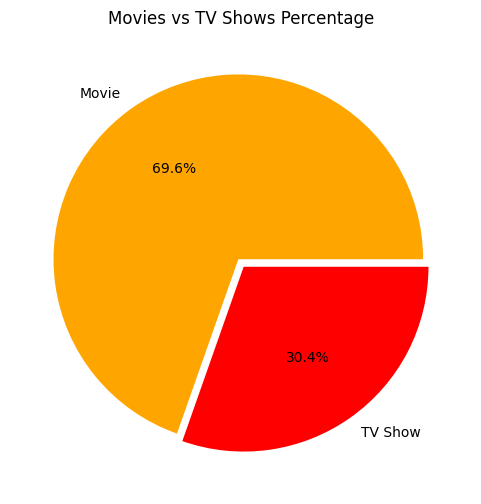

In [ ]:
# Story 9
# Piechart: Movies vs TV Shows
plt.figure(figsize=(6,6))
plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts()
.index,colors=['orange','red'],autopct='%1.1f%%')
plt.title("Movies vs TV Shows Percentage")
plt.show()

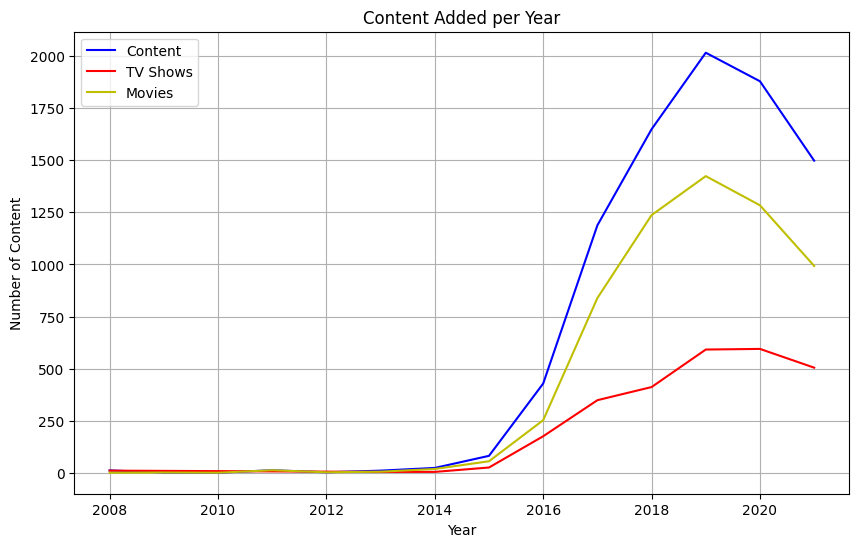

In [ ]:
# Story 10
# Line Plot: Content Added per Year


df_TV=netflix_df[netflix_df['type']=="TV Show"]
df_Movie=netflix_df[netflix_df['type']=="Movie"]

content_added_per_year = netflix_df['year_added'].value_counts().sort_index()
Movies_added_per_year = df_Movie['year_added'].value_counts().sort_index()
TV_added_per_year = df_TV['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(content_added_per_year.index, content_added_per_year.values,color="blue", label="Content")
plt.plot(TV_added_per_year.index, TV_added_per_year.values,color='red',label="TV Shows")
plt.plot(Movies_added_per_year.index, Movies_added_per_year.values,color='y',label="Movies")

plt.title('Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.grid(True)
plt.legend()
plt.show()

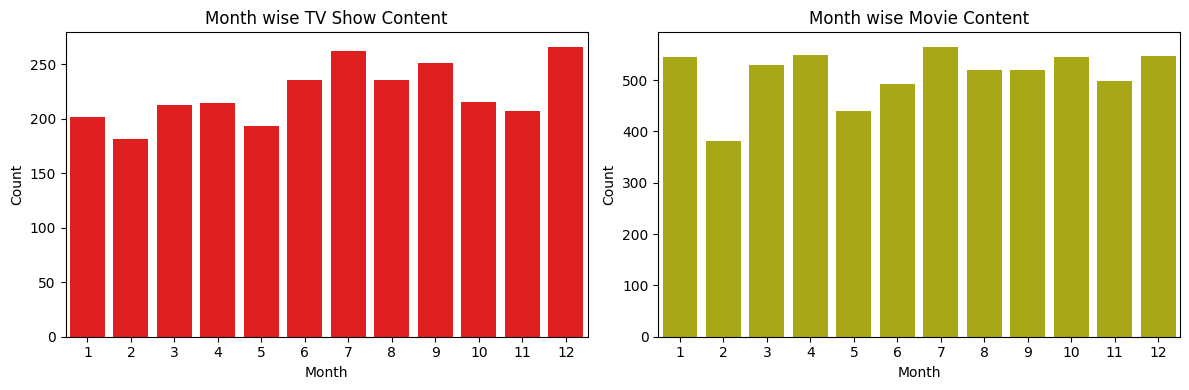

In [ ]:
# Story 11
# Bar Plot: Month Wise Analysis for TV Shows/ Movies

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
TVShows_added_per_month = df_TV['month_added'].value_counts().sort_index()
sns.barplot(x=TVShows_added_per_month.index, y=TVShows_added_per_month.values, color='red')
plt.title("Month wise TV Show Content")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.ylabel("Count")

plt.subplot(1,2,2)
Movies_added_per_month = df_Movie['month_added'].value_counts().sort_index()
sns.barplot(x=Movies_added_per_month.index, y=Movies_added_per_month.values, color='y')
plt.title("Month wise Movie Content")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()

plt.show()

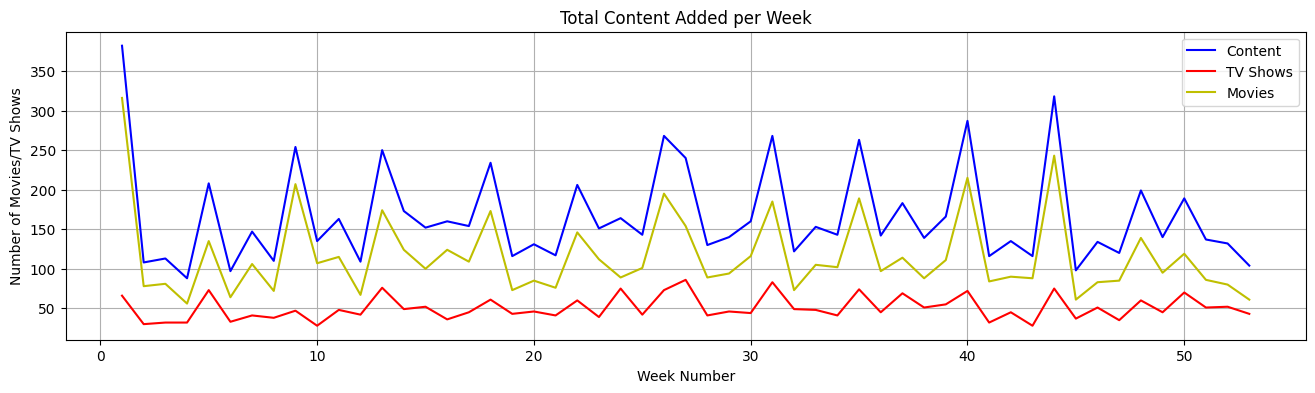

In [ ]:
# Story 12
# Line chart: Content added per week

weekly_content_count = netflix_df.groupby('week_number')['show_id'].count()
weekly_TV_count = df_TV.groupby('week_number')['show_id'].count()
weekly_Movie_count = df_Movie.groupby('week_number')['show_id'].count()

plt.figure(figsize=(16,4))
plt.plot(weekly_content_count.index, weekly_content_count.values, color='blue', label='Content')
plt.plot(weekly_TV_count.index, weekly_TV_count.values, color='red', label='TV Shows')
plt.plot(weekly_Movie_count.index, weekly_Movie_count.values, color='y', label='Movies')

plt.title('Total Content Added per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)
plt.legend()
plt.show()

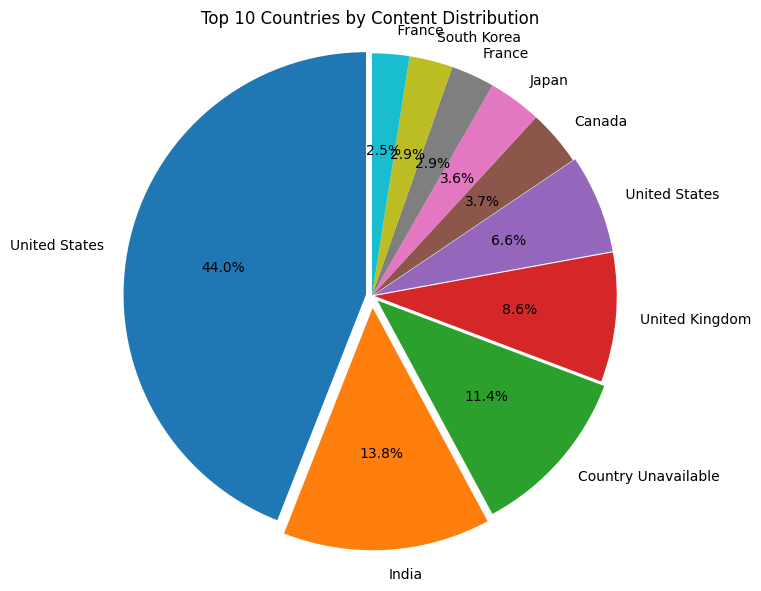

In [ ]:
# Story 13
# Pie Chart: Content Distribution by Country
country_counts = netflix_df['country'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(country_counts, labels=country_counts.index,explode=(0.025,0.05,0.03,0.01,0.01,0,0,0,0,0,), autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by Content Distribution')
plt.axis('equal')
plt.show()

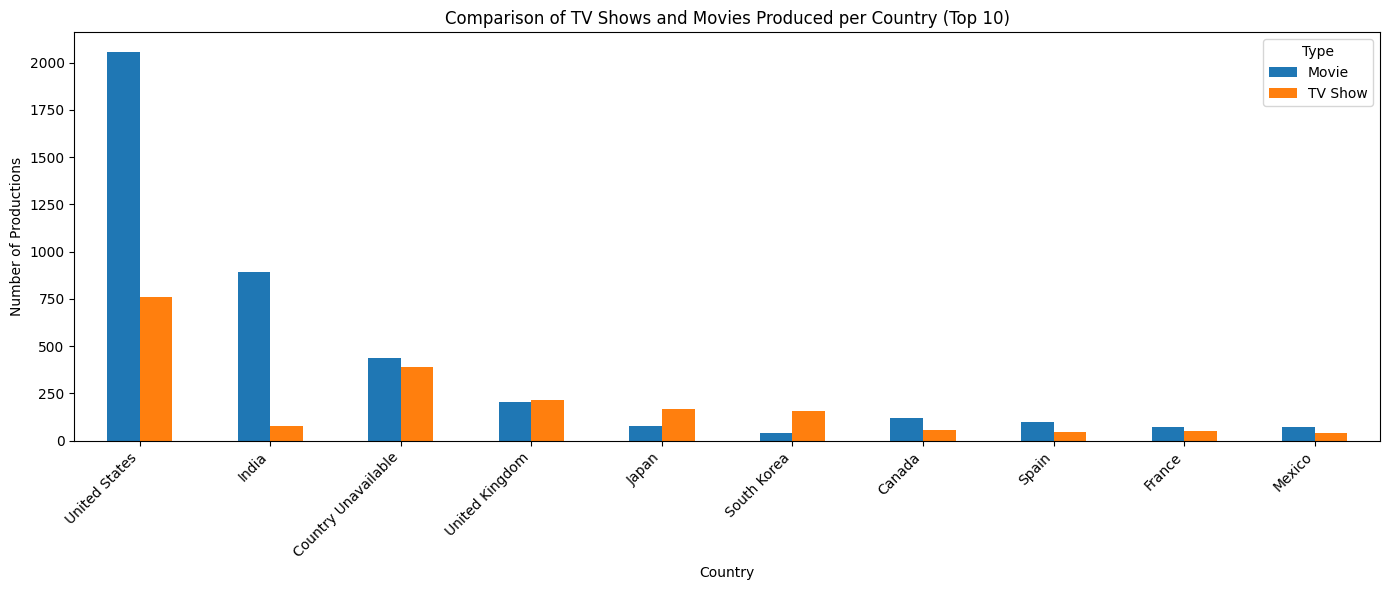

In [ ]:
# Story 14
# Bar chart: Content Distribution by Type per Country
country_type_counts = netflix_df.groupby(['country', 'type']).size().unstack(fill_value=0)

top_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_country_data = country_type_counts.loc[top_countries]

top_country_data.plot(kind='bar', figsize=(14, 6))
plt.title('Comparison of TV Shows and Movies Produced per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

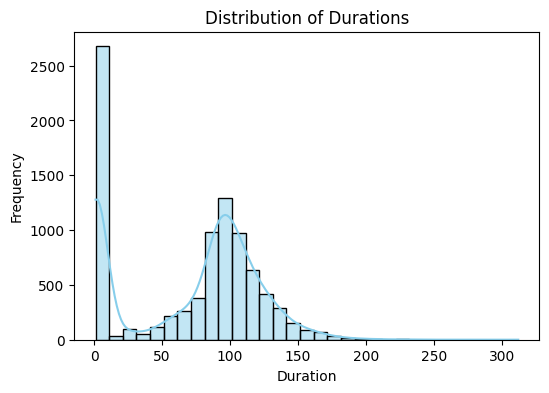

In [ ]:
# Story 15
# Histplot: Duration Analysis
netflix_df['duration_num'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(6,4))
sns.histplot(netflix_df['duration_num'], kde=True, color='skyblue')
plt.title('Distribution of Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

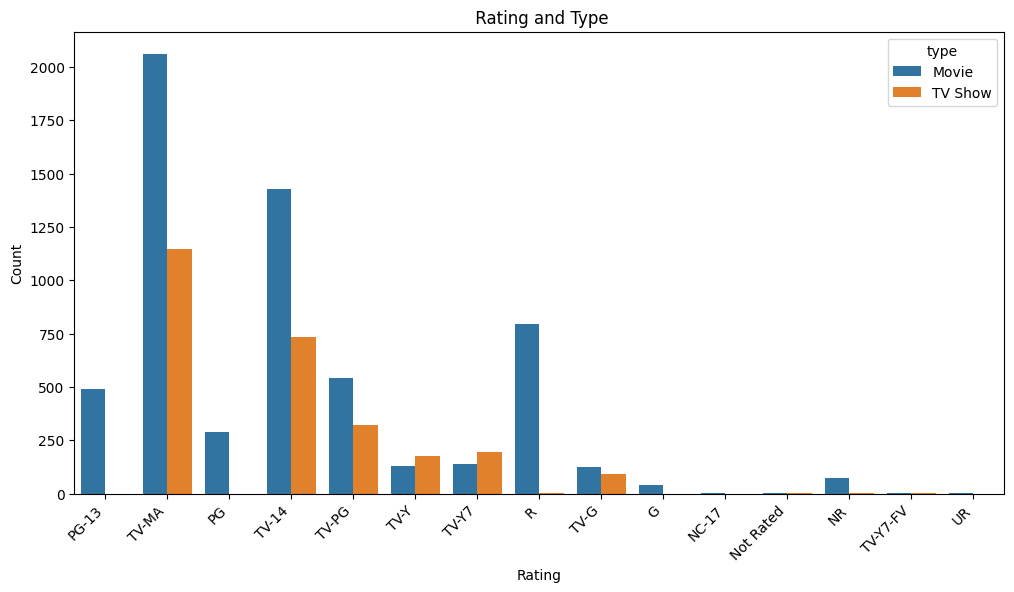

In [ ]:
# Story 16
# Countplot: Rating and Type
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', hue='type', data=netflix_df)
plt.title(' Rating and Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

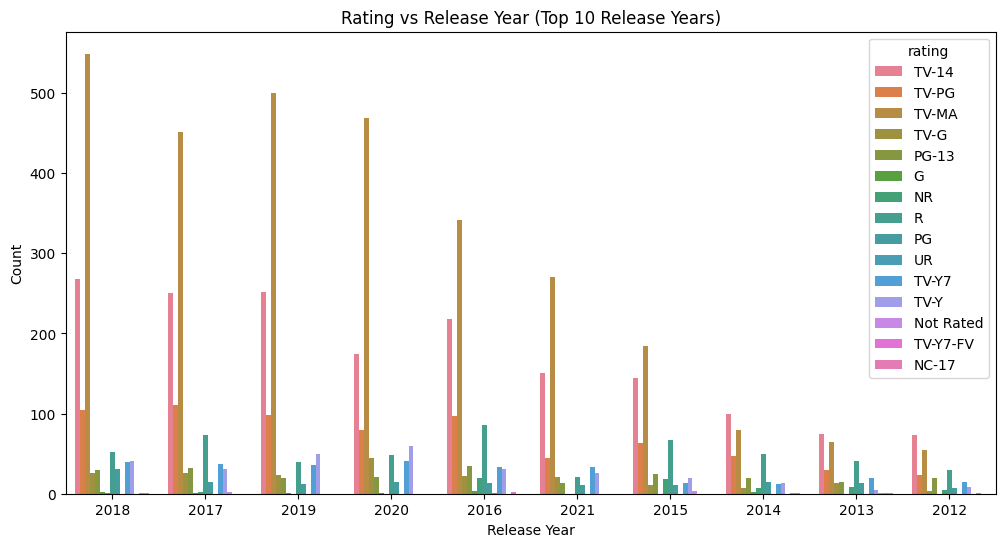

In [ ]:
# Story 17
# Countplot: Rating vs Release Year
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='release_year', hue='rating',
              order=netflix_df['release_year'].value_counts().index[:10])
plt.title('Rating vs Release Year (Top 10 Release Years)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

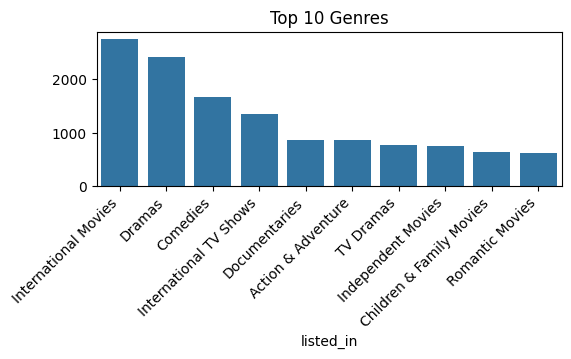

In [ ]:
# Story 18
# Bar Plot: Top Genres
genre_counts = netflix_df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(6,2))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title(f'Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

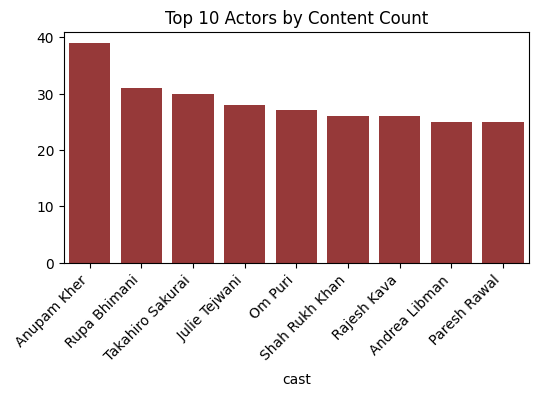

In [ ]:
# Story 19
# Barplot: Top Actors
actor_counts = netflix_df['cast'].str.split(',').explode().value_counts().head(10)[1:]
plt.figure(figsize=(6,3))
sns.barplot(x=actor_counts.index, y=actor_counts.values, color='brown')
plt.title(f'Top {10} Actors by Content Count')
plt.xticks(rotation=45, ha='right')
plt.show()

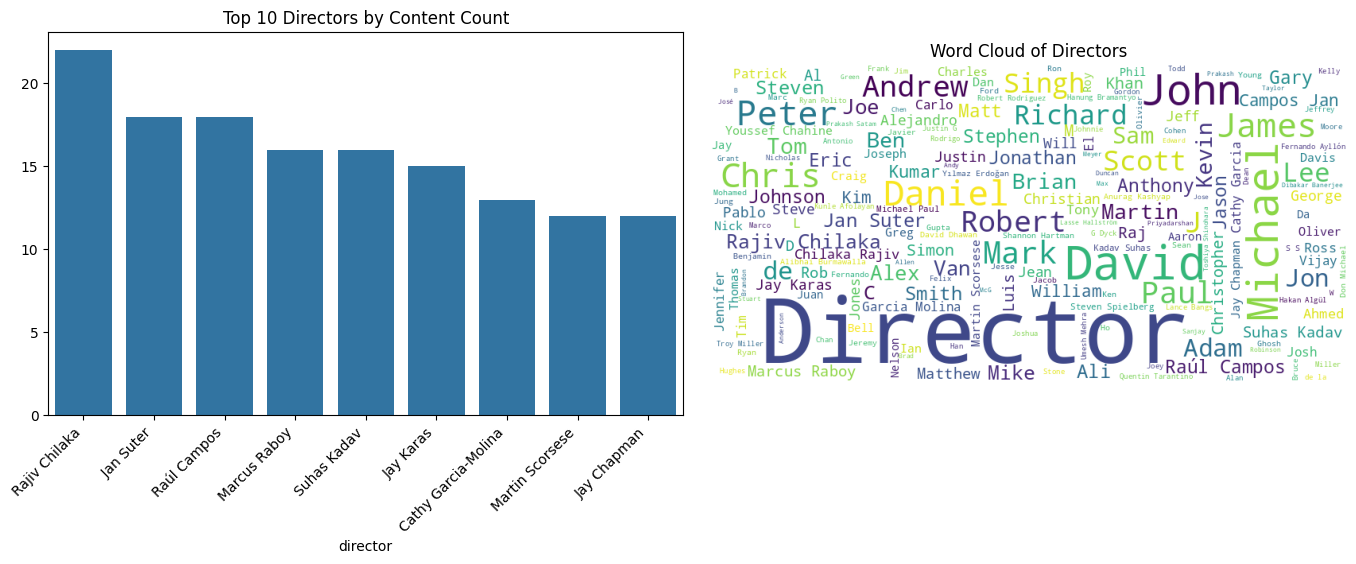

In [ ]:
# Story 20
# Barplot: Top Directors
director_counts = netflix_df['director'].str.split(',').explode().value_counts().head(10)[1:]
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.title(f'Top 10 Directors by Content Count')
plt.xticks(rotation=45, ha='right')

director_text = ' '.join(director for director_list in netflix_df['director'] for director in str(director_list).split(','))

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS)).generate(director_text)
plt.subplot(1,2,2)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=2)
plt.title("Word Cloud of Directors") # Added title
plt.show()

plt.show()

#Insights (Visual Analysis)
9. Content over netflix has been divided in two types: Movie and TV Show.
10. - Irrespective of the content release date, all the data has been added from 2013.
  - Highest amount of content is added in 2019.
  - It has been noticed that movies are more added than TV Shows.
11. - TV Show
      - Highest added in September followed by December.
      - Least added in February followed by May.
  - Movies
      - Highest added in September. Almost added in all months.
      - Least added in February followed by May.
12. This suggests that every first week of the month is the time when content is being added.
13. - Nearly 11.4% of country data is unavailable.
  - More than 50% of the content is produced by two countries (United States and India).
14. - Nearly equal country data is missing for both the types.
  - Japan, South Korea and United Kingdom produce more TV Show than the movie.
  - India produce very few TV Show incomparison of Movies.
15. -  The first bin represents the numerical part of seasons 1,2,3.
 - The median and mode time duration for content is in a binof 85-100 min.
16.  On noticing, the content of TV Show is rated under 7 categories where as Movies are rated under 14 categories.
It is also found that TV-Y and TV-Y7 are more famous among TV SHow than Movies.
17. Over the time period in years (after 2014) , a movement of rating from "TV-14" rating to "TV-MA" can be found.
18. Most common genre is Dramas and Comedies.
19. Most valued actor: Anupam Kher.
20. Most valued director: Rajiv Chilaka.

#Business Insights
	Netflix is a video straming platform which started in 2013 and became famous around 2017. We can notice high content upload from 2017 onwards. This suggests that the platform increased it budget and its content from 2017.

	Over the years, it sounds like netflix has cracked a pattern to upload data in the first week of every month and specifically targetting Fridays for uploading content. This day is best for uploading content as it is followed by weekends (people making time).

	It is noticed that mostly the movies before 2015 are rated under “TV-14” and over the proceeding years, the movies started to be rated under “TV-MA”. Also, it is found that TV Shows are compared to Movies are more(in count) rated under “TV-Y” and “TV-Y7”.

	Also, the analysis shows that “South Korea”, “Japan” and “United Kingdom” contribute more TV Shows than Movies which means that there shows are more famous than other countries and grab a large amount of audience.


# Recommendations
1.	The details about the directors, the cast and the country of origin should be made available to the subscribers as people tend to watch content whose basic details are known. Also it is created from reknowned directors or have reknowned cast, the streaming will increase.

2.	The genre has low variety which fails to attract variety of people, most vast category of genre should be included in order to grab a variety in the customers. For example, people like documentries and horror but there is very few such content available.

3.	Some countries are known for TV Shows, like South Korea, Japan and United Kingdom, so there shows must be uploaded and only a few movies should be prioritised. The budget that we don’t we don’t invest and is saved, further it can be invested in different content purchase.

4.	The content size must be taken into consideration while uploading uploading it.

5.	Netflix need to focus more on TV Show which will lead to attract more subscribers.
